## 改行の一人一文の長さ

In [25]:
file_num = '010'

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ginza
import spacy
%matplotlib inline

In [30]:
def removeZenkakuSpace(df, cols):
    for col in cols:
        df[col] = df[col].str.replace('　', ' ')
    return df

def histEachFavs(df, col, height=3, aspect=4, title=''):
    '''
    FAVごとのカラムの要素のヒストグラム
    '''
    for fav in sorted(df[FAV].unique()):
        sns.catplot(x=col,data=df.query(f"{FAV} == @fav"),kind='count',height=height, aspect=aspect)
        plt.title(f'{title} fav group:{fav}')
        
def getQueries(df, cols):
    assert type(cols) == str or type(cols) == list, 'cols is str or list'
    queries = []
    if type(cols) == str:
        queries = [f'{cols} == {flag}' for flag in sorted(df[cols].unique())]
    elif type(cols) == list:
        for col in cols:
            col_queries = [f'{col} == {flag}' for flag in sorted(df[col].unique())]
            if len(queries) == 0:
                queries = col_queries
            else:
                queries = [f"{q} & {col_queries[0]}" for q in queries] + [f'{q} & {col_queries[1]}' for q in queries]
            
    return queries

def columnUnique(df, col):
    return sorted(df[col].unique())

def histColumnsFavs(df, cols:list, height=3, aspect=6, title=''):
    '''
    カラムの要素に対するのFAVの数のヒストグラム
    colsがlistのときは複数カラムの要素ごと
    '''
    queries = getQueries(df, cols)
    for query in queries:
        data = df.query(query)
        if len(data) == 0:
            continue
        sns.catplot(x=FAV,data=data,kind='count',height=height, aspect=aspect)
        plt.title(f'{title} {query}')
        
def histEachFavsByCategory(df, df_target, col):
    '''
    
    '''
    cats = sorted(df[col].unique())
    for cat in cats:
        fig, axes = plt.subplots(figsize=(30,10), ncols=3, nrows=2)
        for ax, fav in zip(axes.ravel(), favs):
            target_mask = (df[FAV] == fav) & (df[col] == cat)
            ax.hist(df_target.loc[target_mask], bins=100)
            ax.set_xlim(-1,df_target.max())
            ax.set_title(f'category:{cat}, fav:{fav}, num={target_mask.sum()}')

In [3]:
out_dir = '../output'
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
ID = 'ncode'
FAV = 'fav_novel_cnt_bin'
favs = sorted(train_df[FAV].unique())

train_df.userid = train_df.userid.astype('str')
train_df.genre = train_df.genre.astype('str')
test_df.userid = test_df.userid.astype('str')
test_df.genre = test_df.genre.astype('str')
str_cols = ['title', 'story', 'keyword', 'writer']
train_df = removeZenkakuSpace(train_df, str_cols)
test_df = removeZenkakuSpace(test_df, str_cols)


In [4]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')

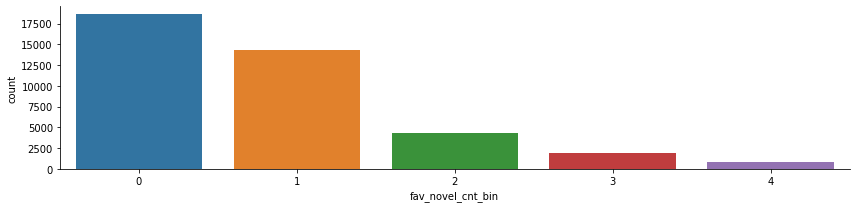

In [26]:
sns.catplot(x=FAV, data=train_df, kind='count', height=3,aspect=4)

In [28]:
train_df['num_sentence'] = train_df.story.str.count('\n')

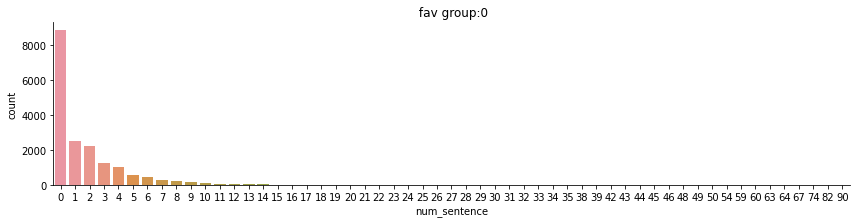

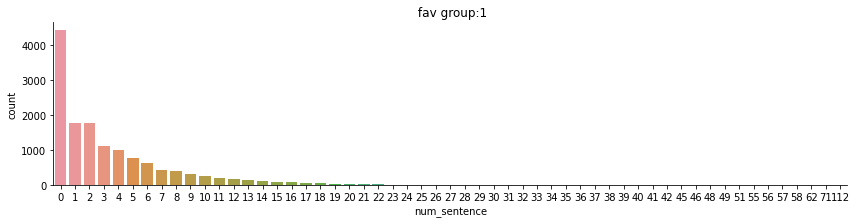

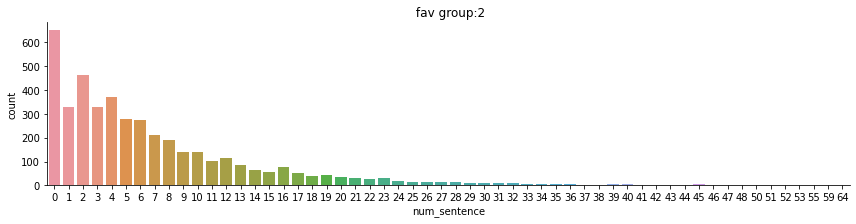

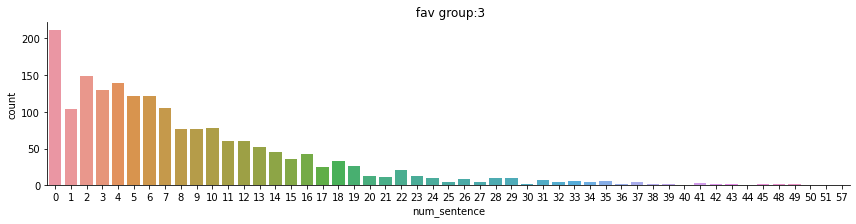

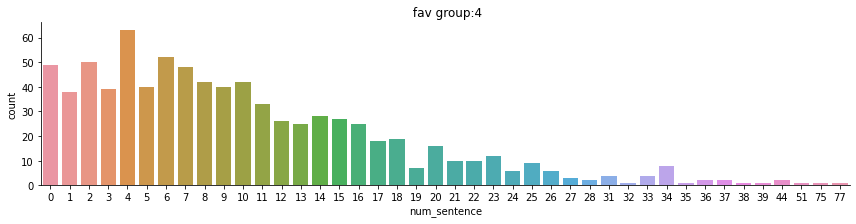

In [31]:
histEachFavs(train_df, 'num_sentence')

In [45]:
def featureMaxSentenceLength(story):
    sentences_len = [len(sentence) for sentence in story.split('\n')]
    return max(sentences_len)
    

In [48]:

train_df['max_sentence_len'] = np.vectorize(featureMaxSentenceLength)(train_df.story)

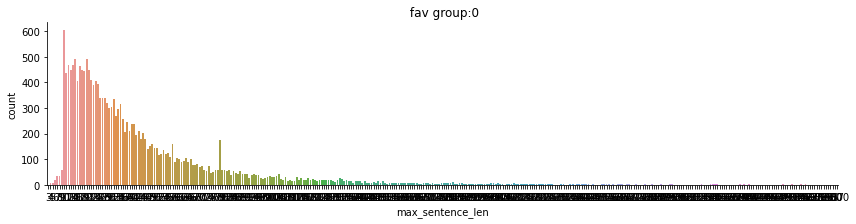

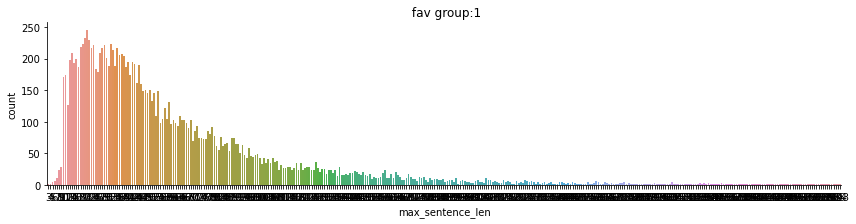

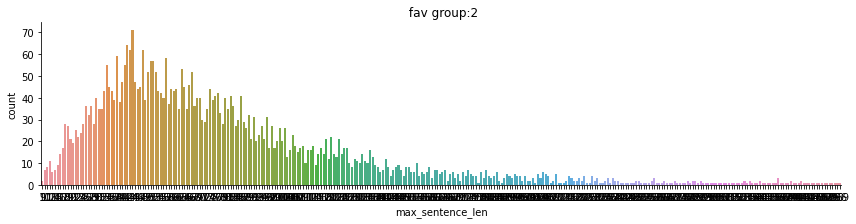

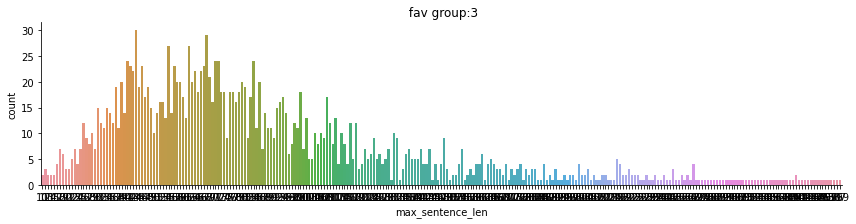

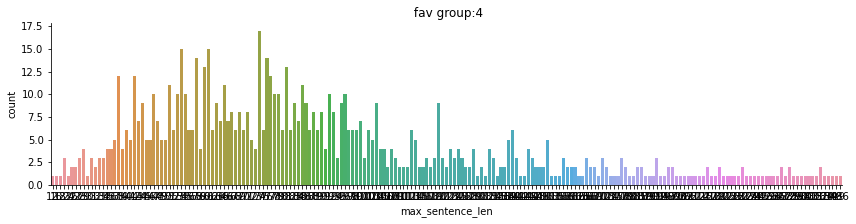

In [49]:
histEachFavs(train_df, 'max_sentence_len')

In [43]:
train_df.story[1]

'ゲームセンターの片隅に置かれた律儀なまでにリアルなゲーム、ヴァルハラ。それはプレイを重ねるたびに俺たちを魅了していった。そして今日も勇士《エイン》たちの戦いは終わらない。――戦場で育まれる戦友達の友情を描いたSFバトル×バトル'

In [63]:
train_df['mean_sentence_len'] = (train_df.story.str.len() / (train_df.story.str.count('\n') +1)).astype('int')

In [58]:
train_df.mean_sentence_len

0         49.400000
1        113.000000
2         25.200000
3        128.000000
4        179.000000
            ...    
39995     18.000000
39996     12.500000
39997     98.000000
39998      8.714286
39999     32.400000
Name: mean_sentence_len, Length: 40000, dtype: float64

In [59]:
train_df.max_sentence_len

0        199
1        113
2         38
3        128
4        179
        ... 
39995     42
39996     20
39997     98
39998     24
39999     79
Name: max_sentence_len, Length: 40000, dtype: int64

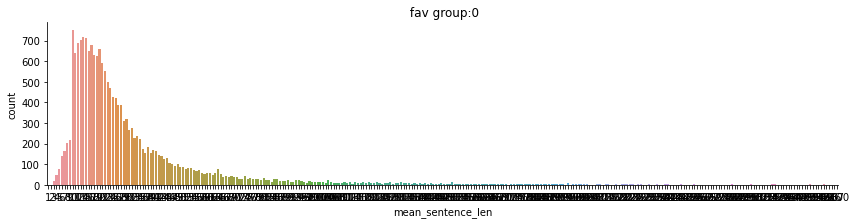

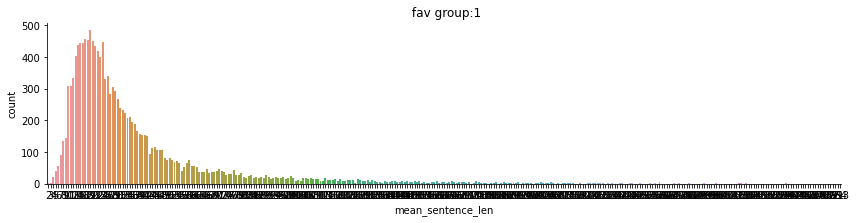

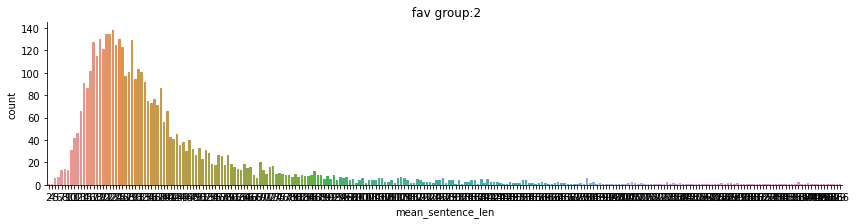

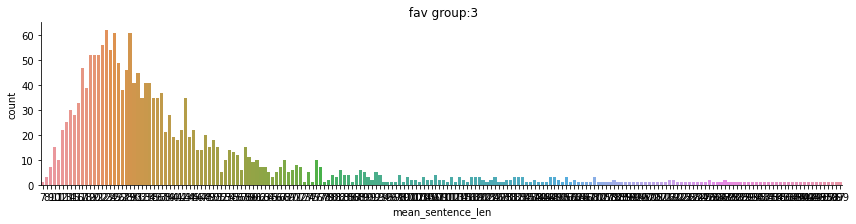

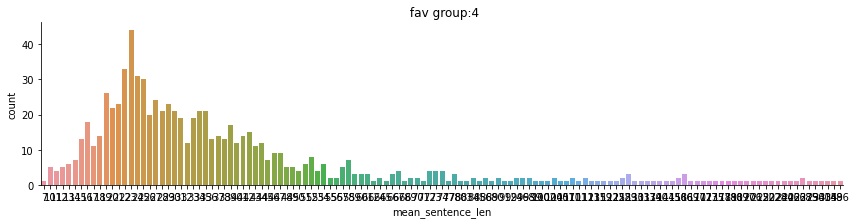

In [64]:
histEachFavs(train_df, 'mean_sentence_len')

In [72]:
def featureNumIndent(story):
    return len(list(filter(lambda x: len(x) == 0 ,story.split('\n'))))

In [74]:
train_df['num_indent'] = np.vectorize(featureIsIndent)(train_df.story)

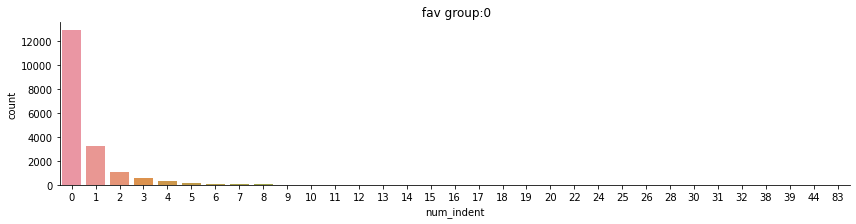

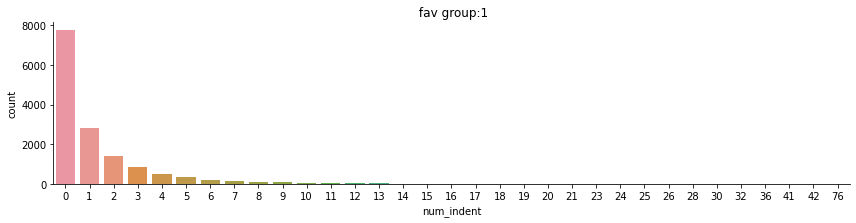

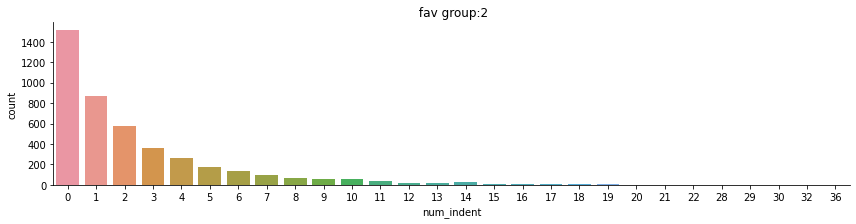

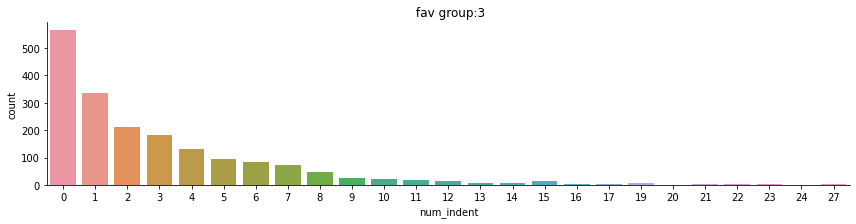

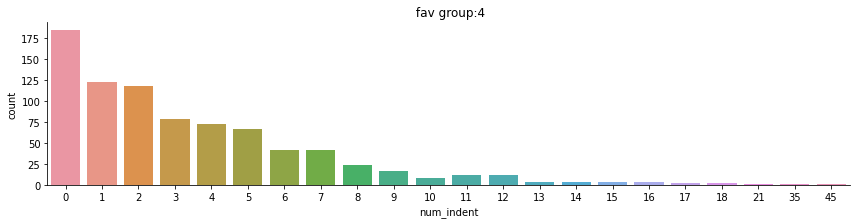

In [75]:
histEachFavs(train_df, 'num_indent')